In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


### simple model for the data

In [4]:
truths_S = [10.5, 1.9, 0.2, -0.05, -0.2, 0]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

plot_range = [[9.8,11.2], [0,4.2], [0,2.2], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

Nstack = 300

In [5]:
ms_A = jsm_mcmc.single_chain("../../mcmc/model_runs/mock_C/model_A/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_B = jsm_mcmc.single_chain("../../mcmc/model_runs/mock_C/model_B/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_C = jsm_mcmc.single_chain("../../mcmc/model_runs/mock_C/model_C/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_D = jsm_mcmc.single_chain("../../mcmc/model_runs/mock_C/model_D/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

In [6]:
mlabels = ["model_A", "model_B", "model_C", "model_D"]

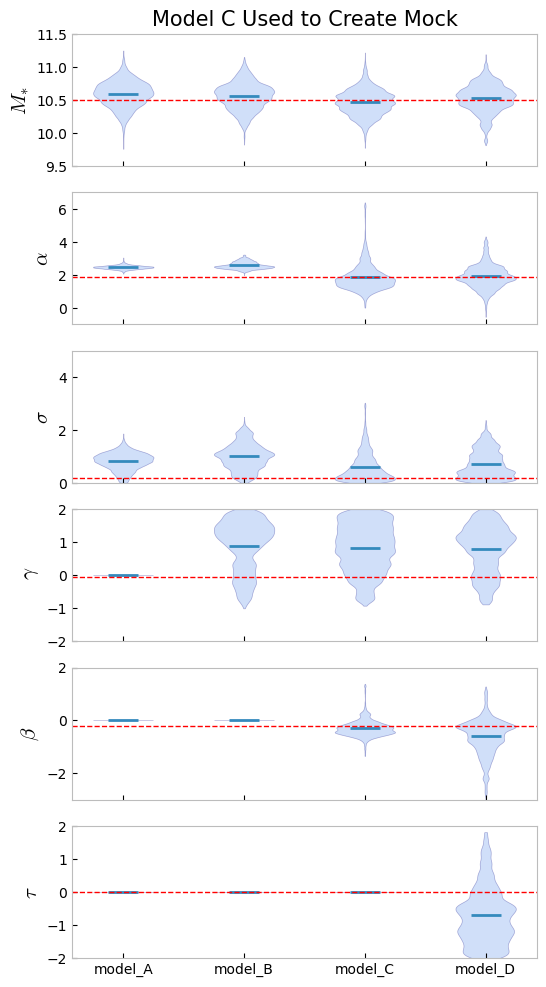

In [7]:
analysis = jsm_mcmc.multi_chain(np.array([ms_A.end, ms_B.end, ms_C.end, ms_D.end]), 3, truths_S, priors, plabels, mlabels, nsigma=2, fill=False, smooth=1.3, title="Model C Used to Create Mock")

# analysis.trim()

# analysis.plot_posteriors()

analysis.violin(6, save_file="../../../paper_1/figures/violin_model_C.pdf")

In [8]:
mlabels = ["model_C", "model_B"]

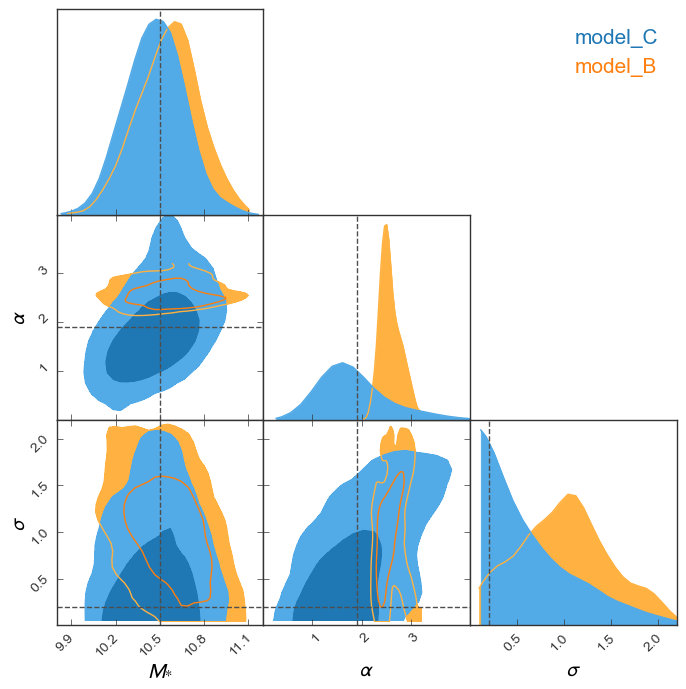

In [9]:
analysis = jsm_mcmc.multi_chain(np.array([ms_C.end, ms_B.end]), 3, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=True, smooth=1.3)
analysis.trim()
analysis.plot_posteriors()